<a href="https://colab.research.google.com/github/1eetnals/coursera-tfcertificate/blob/main/C2_W4_alphabet_finger_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

###코드설명 -> 자세히 되어있음(단계별로)
https://skillmemory.tistory.com/entry/CONVOLUTIONAL-NEURAL-NETWORKS-IN-TENSORFLOW-Multi-class-classifier?category=781615


###케라스 설명
https://tykimos.github.io/2017/01/27/Keras_Talk/

- 모델 학습과정 설정 : compile() / 
학습하기 전에 학습에 대한 설정수행, 손실함수 및 최적화 방법을 정의
- 모델 학습시키기 : fit() / 
훈련셋을 이용해 구성한 모델로 학습시킴
- 모델 평가하기 : evaluate() / 
준비된 테스트셋으로 학습한 모델을 평가
- 모델 사용하기 : predict() / 
임의의 입력으로 모델의 출력을 얻음


**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Click the button on top that says, `Open in Colab`, to run this notebook as a Colab. Running the notebook on your local machine might result in some of the code blocks throwing errors.

In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [ ]:
#알파벳을 손가락 모양으로 표현한 이미지 dataset인 sign MNIST dataset을 다운로드
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

def get_data(filename):   #image dataset을 image set과 label set으로 나누는 함수
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion  
    with open(filename) as training_file:
        ### START CODE HERE
        
        csv_reader = csv.reader(training_file, delimiter=',')  #csv파일 읽기, delimiter는 csv파일이 뭘로 나누어져있는지
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')

        ### END CODE HERE
    return images, labels


training_images, training_labels = get_data('./sign_mnist_train.csv')
testing_images, testing_labels = get_data('./sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:00<00:00, 86.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 66.2MB/s]
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [ ]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3) ### YOUR CODE HERE  #이미지 데이터에서 차원을 하나 추가( 하나의 이미지는 2차원 + 색깔차원 필요함)
testing_images = np.expand_dims(testing_images, axis=3) ### YOUR CODE HERE

train_datagen = ImageDataGenerator(  #이미지 변환하여 training set의 수를 증가시킴
    ### YOUR CODE HERE
    rescale=1. / 255,   #밝기를 1/255로 정규화
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,  
    fill_mode='nearest'
    )


validation_datagen = ImageDataGenerator(   #validation set은 rescale 변환만 해주기 
    ### YOUR CODE HERE
    rescale=1. / 255
    )

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    ### START CODE HERE                                
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)]
    ### END CODE HERE
    )

model.compile(optimizer = tf.optimizers.Adam(), ### YOUR CODE HERE)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

#flow를 이용해 설정한 batch size만큼씩, 계속 데이터 가져와서 모델 학습되도록 함.
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32), ### YOUR CODE HERE)
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

# The output from model.evaluate should be close to:
# [6.92426086682151, 0.56609035]


Epoch 1/15
857/857 [==============================] - 28s 15ms/step - loss: 2.7565 - accuracy: 0.1657 - val_loss: 1.7811 - val_accuracy: 0.4228
Epoch 2/15
857/857 [==============================] - 13s 16ms/step - loss: 2.0255 - accuracy: 0.3588 - val_loss: 1.3212 - val_accuracy: 0.5201
Epoch 3/15
857/857 [==============================] - 12s 14ms/step - loss: 1.6896 - accuracy: 0.4583 - val_loss: 1.0722 - val_accuracy: 0.5913
Epoch 4/15
857/857 [==============================] - 13s 15ms/step - loss: 1.4461 - accuracy: 0.5295 - val_loss: 1.0387 - val_accuracy: 0.6418
Epoch 5/15
857/857 [==============================] - 14s 16ms/step - loss: 1.2938 - accuracy: 0.5775 - val_loss: 0.8573 - val_accuracy: 0.6927
Epoch 6/15
857/857 [==============================] - 16s 19ms/step - loss: 1.1746 - accuracy: 0.6152 - val_loss: 0.7801 - val_accuracy: 0.7175
Epoch 7/15
857/857 [==============================] - 13s 15ms/step - loss: 1.0685 - accuracy: 0.6449 - val_loss: 0.6188 - val_accuracy:

[182.3108367919922, 0.661600649356842]

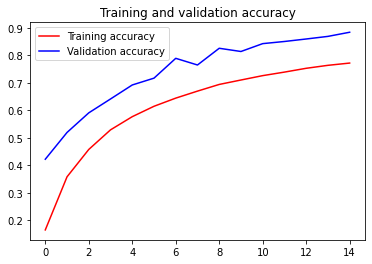

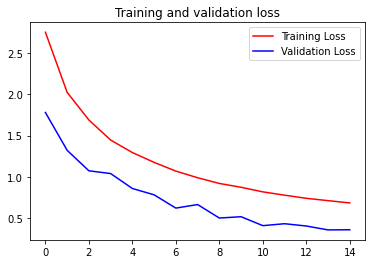

In [ ]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy'] ### YOUR CODE HERE
val_acc = history.history['val_accuracy'] ### YOUR CODE HERE
loss = history.history['loss'] ### YOUR CODE HERE
val_loss = history.history['val_loss'] ### YOUR CODE HERE

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()  #legend : 그래프가 뭔지 표시해주는것임
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()